## Euro - dollar exchange rate in past 24 months

## Importing packages

In [1]:
import pandas as pd ###using pandas in order to structure data in a dataframe and get all other benefits while wrangling data
import os ###using os for enviromental variables 
import requests ###using requests to get the data from the website
import matplotlib.pyplot as plt ###using matplot.lib.pyplot to plot data and show trends - to visually depict my goal
import boto3 ###using boto3 to storage data into my aws account

## Requesting data

In [2]:
api = os.environ.get('alphavantageapi')
url = 'https://www.alphavantage.co/query?function=FX_MONTHLY&from_symbol=EUR&to_symbol=USD&apikey=api'
r = requests.get(url)
data = r.json()
#print(data)

## Storaging data in a functional structure (dataframe)

In [3]:
dataframe = pd.DataFrame.from_dict(data['Time Series FX (Monthly)'], orient = 'index')
dataframe.columns = ['Open', 'High', 'Low', 'Close']
dataframe
###Monthly data from 2004 to 2023 

,Open,High,Low,Close
2023-02-19,1.08610,1.10327,1.06110,1.06876
2023-01-31,1.07031,1.09294,1.04816,1.08626
2022-12-30,1.04041,1.07363,1.03906,1.07025
2022-11-30,0.98818,1.04969,0.97280,1.04041
2022-10-31,0.97954,1.00937,0.96290,0.98814
...,...,...,...,...
2004-05-31,1.19760,1.22950,1.17760,1.21940
2004-04-30,1.22950,1.23880,1.17560,1.19790
2004-03-31,1.24820,1.25390,1.20430,1.23140
2004-02-27,1.24140,1.29270,1.23670,1.24860


In [4]:
import datetime as dt

transposeddf = pd.DataFrame.transpose(dataframe)


YearMonthDay = []
for month in transposeddf:
    YearMonthDay.append(dt.datetime.strptime(month, "%Y-%m-%d").date())
###using datetime to get date type of data
###Transposing dataframe to iterate through the columns and get all dates
#print(YearMonthDay)    

In [5]:
dataframe['Month'] = YearMonthDay
###appending a new list to a dataframe
#print(dataframe)

In [8]:
finaldataframe = pd.DataFrame(dataframe.iloc[0:26])
print(finaldataframe)
###Since I am interested only in last two years, I created a new dataframe with data for last two years

,Open,High,Low,Close,Month
2023-02-19,1.08610,1.10327,1.06110,1.06876,2023-02-19
2023-01-31,1.07031,1.09294,1.04816,1.08626,2023-01-31
2022-12-30,1.04041,1.07363,1.03906,1.07025,2022-12-30
2022-11-30,0.98818,1.04969,0.97280,1.04041,2022-11-30
2022-10-31,0.97954,1.00937,0.96290,0.98814,2022-10-31
2022-09-30,1.00507,1.01979,0.95320,0.98003,2022-09-30
2022-08-31,1.02182,1.03687,0.98990,1.00501,2022-08-31
2022-07-29,1.04770,1.04820,0.99500,1.02248,2022-07-29
2022-06-30,1.07308,1.07738,1.03570,1.04771,2022-06-30
2022-05-31,1.05464,1.07870,1.03480,1.07313,2022-05-31


## Insights

In [18]:
minimumvaluesofUSD = finaldataframe['Open'].sort_values(ascending = False)
maximumvaluesofUSD = finaldataframe['Open'].sort_values(ascending = True)
strongestUSD = maximumvaluesofUSD[0:1]
weakestUSD = minimumvaluesofUSD[0:1]
print(strongestUSD) ###2022-10-31: 0.97954
print(weakestUSD) ###2021-06-30: 1.22259

2022-10-31    0.97954
Name: Open, dtype: object
2021-06-30    1.22259
Name: Open, dtype: object


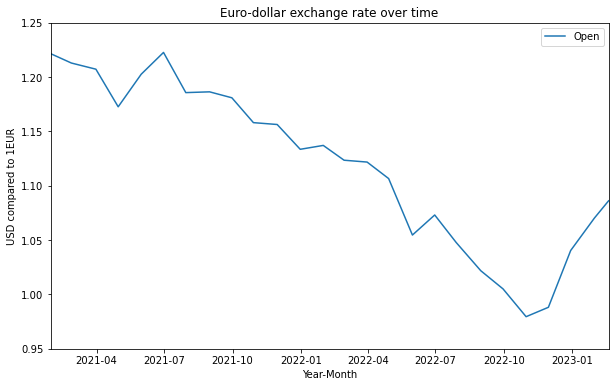

In [21]:
finaldataframe[['Open', 'High', 'Low', 'Close']] = finaldataframe[['Open', 'High', 'Low', 'Close']].astype(float)
###Changing data type because before changing it to numeric format I wasn't able to plot the trend


finaldataframe.plot(x="Month", y='Open', kind="line")
plt.ylim(0.95, 1.25)
plt.xlim(finaldataframe['Month']['2021-01-29'], finaldataframe['Month']['2023-02-19'])
###ATTENTION! Data for February 2023 changes on daily basis so if we try to plot February 19th 2023 but we scraped data on
###February 20th 2023 we will get an error. The last day in dataset will always be a date on which we scrape data.
plt.xlabel('Year-Month')
plt.ylabel('USD compared to 1EUR')
plt.title('Euro-dollar exchange rate over time')
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

In [22]:
finaldataframe.to_csv('ExchangeRateEURUSD.csv')
###Saving dataframe in order to upload it to s3 bucket

## Initalizing S3 connection

In [23]:
import boto3 ###to connect with aws

In [24]:
aws_access_key_id = os.environ['aws_access_key_id']
aws_secret_access_key = os.environ['aws_secret_access_key']
s3 = boto3.client('s3', region_name='us-east-1',  
                        aws_access_key_id=aws_access_key_id, 
                         aws_secret_access_key=aws_secret_access_key)

In [28]:
bucket = 'dnikcevic-individual-files'

s3.upload_file(
    Filename = 'exchangerateEURUSD.csv',
    Bucket = bucket,
    Key = 'exchangerateEURUSD.csv'
)
###Uploading file to s3

In [30]:
s3.put_object_acl(
    Bucket = bucket,
    Key = 'exchangerateEURUSD.csv',
    ACL = 'public-read'
)

###Allowing public access to url

{'ResponseMetadata': {'RequestId': 'H77Q14KP3DWS3SK3',
  'HostId': 'sqTm01aDjsHFgBuULEx36U+92Wo9u1LFonTrOuLFOvv52txsa4QMuXDA0whuXAVFkQibkM9F0wN72f0b5ajZMA==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'sqTm01aDjsHFgBuULEx36U+92Wo9u1LFonTrOuLFOvv52txsa4QMuXDA0whuXAVFkQibkM9F0wN72f0b5ajZMA==',
   'x-amz-request-id': 'H77Q14KP3DWS3SK3',
   'date': 'Sun, 19 Feb 2023 23:34:31 GMT',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0}}

## Creating URL

In [34]:
url = "https://{}.s3.amazonaws.com/{}".format(bucket, "exchangerateEURUSD.csv")
url ###https://dnikcevic-individual-files.s3.amazonaws.com/exchangerateEURUSD.csv

'https://dnikcevic-individual-files.s3.amazonaws.com/exchangerateEURUSD.csv'

Danilo Nikcevic, February 19th 2023